In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import folium

import ast

import sys
import matplotlib.gridspec as gridspec



%matplotlib inline
sns.set(color_codes=True)
sns.set_palette("deep")

In [2]:
#cluster data
kmeans_cluster_selected_df = pd.read_csv('data/kmean_clusters_withFlags_8PCA_upto3miles_selectedVariable.csv')

#create a variable TripDistance in miles
# kmeans_cluster_df['tripDistance_miles'] = kmeans_cluster_df.apply(lambda x: x['tripDistance']/5280, axis=1)
kmeans_cluster_selected_df.head()

,Unnamed: 0,tripDuration,tripDistance_miles,StartTime_AMPeak,StartTime_Day,StartTime_PMPeak,StartTime_Night,origin_emp_density_perMile,destination_emp_density_perMile,destination_pop_density_perMile,...,kmean_cluster_10,kmean_cluster_11,kmean_cluster_12,kmean_cluster_13,kmean_cluster_14,kmean_cluster_15,kmean_cluster_16,kmean_cluster_17,kmean_cluster_18,kmean_cluster_19
0,0,4.863267,0.659896,0,0,0,1,66028.995549,4651.938119,345.957386,...,0,4,4,4,6,6,6,6,4,4
1,1,2.301083,0.239849,0,0,0,1,171759.500659,17769.861925,9298.818799,...,4,2,11,1,2,2,2,2,15,15
2,2,1.526600,0.079536,0,0,0,1,76697.996907,317589.557663,4883.546206,...,6,7,8,11,8,8,8,16,14,14
3,3,5.664400,0.259733,0,0,0,1,93878.933828,93878.933828,5061.155631,...,5,4,0,4,11,11,11,11,12,12
4,4,6.711383,0.449873,0,0,0,1,130038.135042,47729.808467,0.000000,...,5,4,0,4,11,11,11,11,12,12


In [3]:
features =['tripDuration', 'tripDistance_miles',
           'StartTime_AMPeak', 'StartTime_Day', 'StartTime_PMPeak', 'StartTime_Night',
           'origin_emp_density_perMile', 'destination_emp_density_perMile',
           'destination_pop_density_perMile', 'origin_pop_density_perMile',
           'average_trip_speed_mph', 'route_directness', 'weekend_trip',
           'origin_CBD', 'origin_URBAN', 'origin_SU', 'origin_RURAL',
           'destination_CBD', 'destination_URBAN', 'destination_SU', 'destination_RURAL',
           'origin_SHT_PRK_density', 'origin_LNG_PRK_density',
           'destination_SHT_PRK_density', 'destination_LNG_PRK_density',
           'origin_NFL_DRAFT', 'origin_VANDERBILT', 'origin_PARK', 
           'destination_NFL_DRAFT', 'destination_VANDERBILT','destination_PARK']
kmeans_cluster_selected_df[features].describe().transpose()#.to_csv('../Results_for_report/descriptive_stat_variables.csv')

,count,mean,std,min,25%,50%,75%,max
tripDuration,79009.0,14.775277,11.398374,1.000000,6.913683,11.500000,19.166667,89.850000
tripDistance_miles,79009.0,0.527477,0.648338,0.037904,0.081107,0.194830,0.769879,2.999980
StartTime_AMPeak,79009.0,0.058069,0.233876,0.000000,0.000000,0.000000,0.000000,1.000000
StartTime_Day,79009.0,0.362060,0.480599,0.000000,0.000000,0.000000,1.000000,1.000000
StartTime_PMPeak,79009.0,0.311192,0.462984,0.000000,0.000000,0.000000,1.000000,1.000000
StartTime_Night,79009.0,0.268678,0.443275,0.000000,0.000000,0.000000,1.000000,1.000000
origin_emp_density_perMile,79009.0,67244.769216,89442.842302,0.000000,4957.353690,34288.368495,88511.849870,655065.082608
destination_emp_density_perMile,79009.0,66666.528626,89288.069829,0.000000,4829.253622,36425.159310,87234.965687,655065.082608
destination_pop_density_perMile,79009.0,7342.340495,7621.898448,0.000000,842.764267,5153.406249,10074.101292,42558.517962
origin_pop_density_perMile,79009.0,7517.033983,7743.278113,0.000000,842.764267,5299.904408,10365.567547,42558.517962


## For selected variables-kmeans

In [4]:
selected_cluster ='kmean_cluster_14'
summary_kmeans_cluster_selected_df = kmeans_cluster_selected_df.groupby(selected_cluster).agg([np.median])#, np.std])
summary_kmeans_cluster_selected_df['count']=kmeans_cluster_selected_df.groupby(selected_cluster).size()/len(kmeans_cluster_selected_df)*100
round(summary_kmeans_cluster_selected_df.transpose(),2)#.to_csv('kmean_N=14_median.csv')

,kmean_cluster_14,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Unnamed: 0,median,42547.00,34631.00,38119.00,43063.00,40278.50,39246.00,38244.00,38519.00,37011.00,30308.50,29790.00,34933.00,36146.00,43049.00
tripDuration,median,11.74,12.00,10.54,13.48,6.47,19.00,11.02,8.71,13.02,18.58,13.25,10.00,13.18,14.03
tripDistance_miles,median,0.23,0.35,0.89,0.10,0.07,0.81,0.49,0.56,0.25,0.11,0.30,0.63,0.37,0.12
StartTime_AMPeak,median,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
StartTime_Day,median,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
StartTime_PMPeak,median,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
StartTime_Night,median,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
origin_emp_density_perMile,median,11145.53,66029.00,13700.50,47217.88,4565.24,4829.25,60974.78,4651.94,76698.00,45.06,702.83,66029.00,317589.56,9927.96
destination_emp_density_perMile,median,9076.90,66029.00,8045.57,66029.00,4565.24,4829.25,4651.94,130038.14,317589.56,24.54,350.23,66029.00,48275.88,8161.12
destination_pop_density_perMile,median,5770.07,7681.10,5920.67,7816.73,0.00,0.00,345.96,9960.46,11532.79,508.35,2163.95,7681.10,4762.24,5770.07


In [5]:
kmeans_cluster_selected_df[['tripDuration','tripDistance_miles',selected_cluster]].groupby(selected_cluster).agg([np.sum]).transpose()#.to_csv('kmeans_N=14_sum.csv')

,kmean_cluster_14,0,1,2,3,4,5,6,7,8,9,10,11,12,13
tripDuration,sum,80744.353867,179546.261667,66112.604850,221539.452333,74000.739183,68125.473400,34479.989833,23236.491067,62591.672933,324.800000,3313.027100,143729.964050,57396.627567,152238.399883
tripDistance_miles,sum,3605.757065,7480.811156,5354.448705,2501.166278,1594.080195,3205.472797,1639.687842,1245.154132,2033.491129,3.907752,124.735013,9042.234008,2352.818584,1491.658848


# breaking down trip cluster

In [6]:
social_trips = kmeans_cluster_selected_df.loc[
    kmeans_cluster_selected_df['kmean_cluster_14'].isin([3,13])]


In [7]:
social_trips.pivot_table(index=['kmean_cluster_14'], columns='weekend_trip', aggfunc='size', fill_value=0)#.to_csv('cluster_3_13.csv')

weekend_trip,0,1
kmean_cluster_14,,
3,6811,6510
13,4643,3958


In [8]:
social_trips[['kmean_cluster_14','weekend_trip','tripDuration','tripDistance_miles']].groupby(
    ['kmean_cluster_14','weekend_trip']).agg(np.sum)#.to_csv('cluster_3_13_summary.csv')

tripDuration  tripDistance_miles
kmean_cluster_14 weekend_trip                                   
3                0             109263.324133         1203.095668
                 1             112276.128200         1298.070611
13               0              81784.545917          811.143555
                 1              70453.853967          680.515292

## Selected variables for GMM

In [9]:
# #cluster data
# gmm_cluster_selected_df = pd.read_csv('../temp/gmm_clusters_withFlags_PCA_selectedVariable.csv')

In [10]:
# selected_cluster ='gmm_cluster_9'
# summary_gmm_cluster_selected_df = gmm_cluster_selected_df.groupby(selected_cluster).agg([np.mean])#, np.std])
# summary_gmm_cluster_selected_df['count']=gmm_cluster_selected_df.groupby(selected_cluster).size()/len(gmm_cluster_selected_df)*100
# round(summary_gmm_cluster_selected_df.transpose(),2)


# ploting graphs

In [11]:
def plot_graph(cluster_df,selected_cluster,variable_to_plot,title,ax,plot_upper_bound, x_label):
    #PURPOSE: Plot kdeplot of a single variable for all cluster type
    #INPUT
    ####ax = axis of gridspec
    ####title: title of the plot
    ####cluster_df: Dataframe with cluster id
    ####selected_cluster: cluster to plot
    ####variable_to_plot: name of the variable to plot
    ####plot_upper_bound: upper bound of the plot
    #OUTPUT: plt plot
    
    #fig, ax = plt.subplots(figsize=(6,4))
    
    #run a loop for all the sorted unique values in cluster
    for i in sorted(cluster_df[selected_cluster].unique()):
        #plot kdeplot for each clusters in same plot
        sns.kdeplot(cluster_df[cluster_df[selected_cluster]==i][variable_to_plot],
                    label=str('C'+str(i)), ax=ax)
    ax.set_title(title, fontsize=10)
    
    ax.legend(fontsize=8, ncol=2)
    
    ax.axis([0, plot_upper_bound, None, None])  
    ax.set_ylabel('Probability', fontsize=9)
    ax.set_xlabel(x_label, fontsize=9)
    ax.tick_params(axis='both', which='major', labelsize=8)
    #return plt



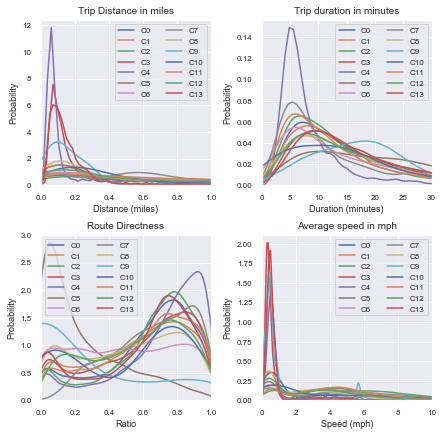

In [12]:
selected_cluster='kmean_cluster_14'

fig= plt.figure(figsize=(7,7))
#fig.suptitle('K mean cluster 10')


gspec = gridspec.GridSpec(2,2)
ax1 = plt.subplot(gspec[0,0])
ax2 = plt.subplot(gspec[0,1])
ax3 = plt.subplot(gspec[1,0])
ax4 = plt.subplot(gspec[1,1])
# ax5 = plt.subplot(gspec[2,0])
# ax6 = plt.subplot(gspec[2,1])



ax1=plot_graph(kmeans_cluster_selected_df,selected_cluster,'tripDistance_miles','Trip Distance in miles',ax1,1,'Distance (miles)')
ax2=plot_graph(kmeans_cluster_selected_df,selected_cluster,'tripDuration','Trip duration in minutes',ax2,30,'Duration (minutes)')
ax3=plot_graph(kmeans_cluster_selected_df,selected_cluster,'route_directness','Route Directness',ax3,1,'Ratio')
ax4=plot_graph(kmeans_cluster_selected_df,selected_cluster,'average_trip_speed_mph','Average speed in mph',ax4,10,'Speed (mph)')
# ax5=plot_graph(kmeans_cluster_selected_df,selected_cluster,'destination_emp_density_perMile','Employment density at destination',ax5,20000)
# ax6=plot_graph(kmeans_cluster_selected_df,selected_cluster,'StartTime_Day','Start time at Night',ax6,1)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.savefig(str('results/'+selected_cluster+'_plot1.png'), dpi=900)

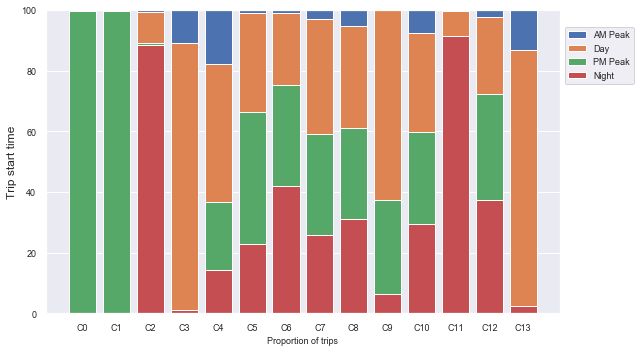

In [13]:
start_time = pd.pivot_table(kmeans_cluster_selected_df[['StartTime_AMPeak', 'StartTime_Day', 'StartTime_PMPeak',
                                           'StartTime_Night',selected_cluster]], index=selected_cluster)*100

fig, ax= plt.subplots(figsize=(9,5))

bar_height_am = start_time[['StartTime_Day','StartTime_PMPeak','StartTime_Night']].sum(axis=1).tolist()
bar_height_day = start_time[['StartTime_PMPeak','StartTime_Night']].sum(axis=1).tolist()
bar_height_pm = start_time[['StartTime_Night']].sum(axis=1).tolist()
bar_height_night = 0

p1=plt.bar(start_time.index,start_time['StartTime_AMPeak'], bottom=bar_height_am, label='AM Peak')
p2=plt.bar(start_time.index,start_time['StartTime_Day'], bottom=bar_height_day, label='Day')
p3=plt.bar(start_time.index,start_time['StartTime_PMPeak'], bottom=bar_height_pm, label='PM Peak')
p4=plt.bar(start_time.index,start_time['StartTime_Night'], bottom=bar_height_night, label='Night')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Trip start time')
#ax.set_title('Percentage of trips by time of the day')
plt.xticks(np.arange(14), ('C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85), fontsize=9)
plt.xlabel('Clusters', fontsize=9)  
plt.xlabel('Proportion of trips', fontsize=9)  
ax.tick_params(axis='both', which='major', labelsize=9)



plt.tight_layout()
plt.savefig(str('results/'+selected_cluster+'_TimeDistribution.png'), dpi=900)


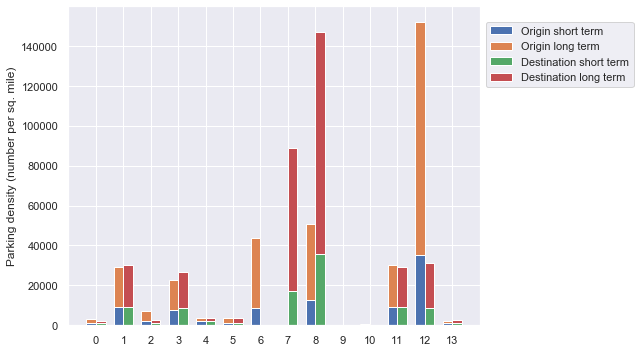

In [14]:
density_plot = pd.pivot_table(kmeans_cluster_selected_df[['origin_SHT_PRK_density', 'origin_LNG_PRK_density',
                                                          'destination_SHT_PRK_density', 'destination_LNG_PRK_density'
                                                          ,selected_cluster]], index=selected_cluster)


# men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
# women_means, women_std = (25, 32, 34, 20, 25), (3, 5, 2, 3, 3)

ind = np.arange(len(density_plot.index))  # the x locations for the groups
width = 0.35  # the width of the bars



fig, ax = plt.subplots(figsize=(9,5))
rects1 = ax.bar(ind - width/2, density_plot['origin_SHT_PRK_density'], width,  label='Origin short term')
rects2 = ax.bar(ind - width/2, density_plot['origin_LNG_PRK_density'], width, bottom=density_plot['origin_SHT_PRK_density'], label='Origin long term')
# rects2 = ax.bar(ind + width/2, density_plot['origin_LNG_PRK_density'], width,  label='Origin long term')

rects3 = ax.bar(ind + width/2, density_plot['destination_SHT_PRK_density'], width,  label='Destination short term')
rects4 = ax.bar(ind + width/2, density_plot['destination_LNG_PRK_density'], width, bottom=density_plot['destination_SHT_PRK_density'], label='Destination long term')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Parking density (number per sq. mile)')
#ax.set_title('Parking availability of clusters at origin and destination')
ax.set_xticks(ind)
#ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))

plt.tight_layout()
plt.savefig(str('results/'+selected_cluster+'_plot3.png'), dpi=900)

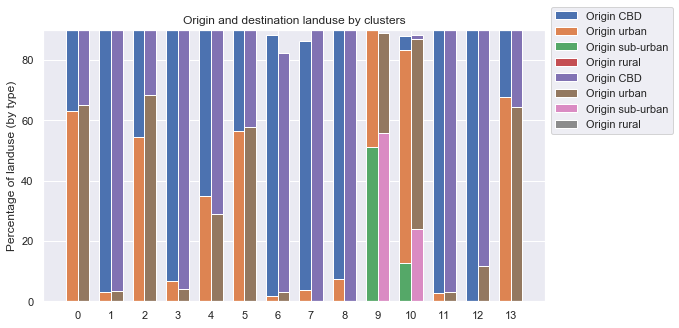

In [15]:


    
landuse_type_plot = pd.pivot_table(kmeans_cluster_selected_df[['origin_CBD', 'origin_URBAN', 'origin_SU', 'origin_RURAL',
                                                               'destination_CBD', 'destination_URBAN', 'destination_SU',
                                                               'destination_RURAL',selected_cluster]], index=selected_cluster)*100


fig, ax = plt.subplots(figsize=(9,5))

ind = np.arange(len(landuse_type_plot.index))  # the x locations for the groups
width = 0.35  # the width of the bars

bar_height_origin_CBD = landuse_type_plot[[ 'origin_URBAN', 'origin_SU', 'origin_RURAL']].sum(axis=1).tolist()
bar_height_origin_URBAN = landuse_type_plot[[ 'origin_SU', 'origin_RURAL']].sum(axis=1).tolist()
bar_height_origin_SU = landuse_type_plot[[ 'origin_RURAL']].sum(axis=1).tolist()
bar_height_origin_RURAL = 0

rects_o1 = ax.bar(ind - width/2, landuse_type_plot['origin_CBD'], width, bottom=bar_height_origin_CBD, label='Origin CBD')
rects_o2 = ax.bar(ind - width/2, landuse_type_plot['origin_URBAN'], width, bottom=bar_height_origin_URBAN, label='Origin urban')
rects_o3 = ax.bar(ind - width/2, landuse_type_plot['origin_SU'], width, bottom=bar_height_origin_SU, label='Origin sub-urban')
rects_o4 = ax.bar(ind - width/2, landuse_type_plot['origin_RURAL'], width, bottom=bar_height_origin_RURAL, label='Origin rural')
# rects2 = ax.bar(ind + width/2, density_plot['origin_LNG_PRK_density'], width,  label='Origin long term')


bar_height_dest_CBD = landuse_type_plot[['destination_URBAN', 'destination_SU','destination_RURAL']].sum(axis=1).tolist()
bar_height_dest_URBAN = landuse_type_plot[['destination_SU','destination_RURAL']].sum(axis=1).tolist()
bar_height_dest_SU = landuse_type_plot[[ 'destination_RURAL']].sum(axis=1).tolist()
bar_height_dest_RURAL = 0

rects_d1 = ax.bar(ind + width/2, landuse_type_plot['destination_CBD'], width, bottom=bar_height_dest_CBD, label='Origin CBD')
rects_d2 = ax.bar(ind + width/2, landuse_type_plot['destination_URBAN'], width, bottom=bar_height_dest_URBAN, label='Origin urban')
rects_d3 = ax.bar(ind + width/2, landuse_type_plot['destination_SU'], width, bottom=bar_height_dest_SU, label='Origin sub-urban')
rects_d4 = ax.bar(ind + width/2, landuse_type_plot['destination_RURAL'], width, bottom=bar_height_dest_RURAL, label='Origin rural')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of landuse (by type)')
ax.set_title('Origin and destination landuse by clusters')
ax.set_xticks(ind)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.85))

In [16]:
landuse_type_plot

,destination_CBD,destination_RURAL,destination_SU,destination_URBAN,origin_CBD,origin_RURAL,origin_SU,origin_URBAN
kmean_cluster_14,,,,,,,,
0,24.789427,0.0,0.172687,64.858150,26.653744,0.0,0.075771,63.027313
1,86.535997,0.0,0.000000,3.463171,86.915522,0.0,0.000000,3.084478
2,21.421418,0.0,0.231125,68.189522,35.369800,0.0,0.034669,54.460709
3,85.892200,0.0,0.000000,4.107049,83.413407,0.0,0.000000,6.586593
4,60.960306,0.0,0.000000,29.039694,55.197239,0.0,0.000000,34.802761
5,32.165014,0.0,0.000000,57.799808,33.431404,0.0,0.000000,56.539815
6,79.281961,0.0,0.026270,2.964098,86.510508,0.0,0.013135,1.768827
7,89.924772,0.0,0.000000,0.075228,82.557765,0.0,0.005373,3.713057
8,90.000000,0.0,0.000000,0.000000,82.692926,0.0,0.002680,7.304394
